In [2]:
import numpy as np
import matplotlib.pyplot as plt

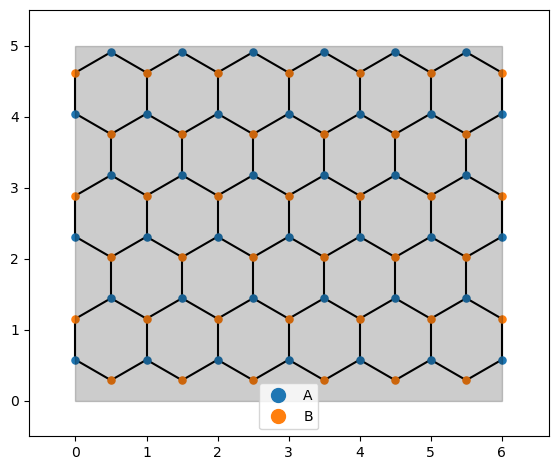

In [39]:
import lattpy as lp

a = 1

graphene_A = lp.Atom("A", radius=0.05)
graphene_B = lp.Atom("B", radius=0.05)

basis = 0.5 * a * np.array([[1, np.sqrt(3)],
                  [1, -np.sqrt(3)]])

latt = lp.Lattice(basis)


latt.add_atom([0.5 * a, -0.5 * a / np.sqrt(3)], graphene_A)
latt.add_atom([0.5 * a, 0.5 * a / np.sqrt(3)], graphene_B)
latt.add_connection(graphene_A, graphene_B, analyze=True)

structure = latt.build((6, 5))

#latt.set_periodic(0)

ax = latt.plot()

structure.plot(ax)
#lp.plotting.draw_unit_cell(ax, latt.center() + basis)

plt.savefig('graphene lattice.pdf', bbox_inches='tight')

[0. 0.] [3.14159265 1.81379936] [4.1887902 0.       ]


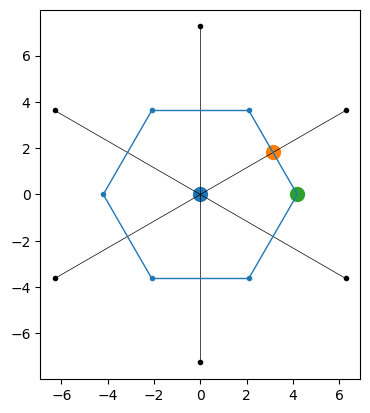

In [40]:
reciprocal_lattice = latt.reciprocal_lattice()

bz = reciprocal_lattice.wigner_seitz_cell()

ax = bz.draw()

Gamma = bz.symmetry_points()[0]
M = bz.symmetry_points()[2][5]
K = bz.symmetry_points()[1][4]

print(Gamma, M, K)

lp.plotting.draw_points(ax, Gamma)
lp.plotting.draw_points(ax, M )
lp.plotting.draw_points(ax, K)

plt.savefig('graphene brillouin_zone.pdf', bbox_inches='tight')